# WeatherPy
----

### Analysis
* The temperature is warmer between -40 to 20 degree latitude. This is as expected as 0 degree latitude is the equator.
* There is no strong relationship between latitude and humidity as there is all level of humidity across all latitude.
* There is also no strong relationship between latitude and cloudiness as there are cities with different level of cloudiness.
* Most cities experience wind speed below 20 mph.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [40]:
# dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time

# import API key
import api_keys

# include citipy to determine city based on latitude and longitude
from citipy import citipy

# range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [41]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# identify nearest city for each latitude, longitude combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [42]:
# open WeatherMap API Key
api_key = api_keys.api_key

# perform API Calls
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# query URL
query_url = url + "appid=" + api_key + "&units=" + units + "&q="

# get weather data
print("Beginning Data Retrival")
print("------------------------------")

set_count = 1
record_count = 1
weather_data = {"City":[],"Cloudiness":[],"Country":[],"Date":[],"Humidity":[],"Lat":[],"Lng":[],"Max Temp":[],"Wind Speed": []}

for city in cities:
    weather_response = requests.get(query_url + city)
    weather_response_json = weather_response.json()
    
    if weather_response.status_code == 200:
        weather_data["City"].append(city)
        weather_data["Cloudiness"].append(weather_response_json["clouds"]["all"])
        weather_data["Country"].append(weather_response_json["sys"]["country"])
        weather_data["Date"].append(weather_response_json["dt"])
        weather_data["Humidity"].append(weather_response_json["main"]["humidity"])
        weather_data["Lat"].append(weather_response_json["coord"]["lat"])
        weather_data["Lng"].append(weather_response_json["coord"]["lon"])
        weather_data["Max Temp"].append(weather_response_json["main"]["temp_max"])
        weather_data["Wind Speed"].append(weather_response_json["wind"]["speed"])
        if record_count <= 50:
            print(f"Processing Record {record_count} of Set {set_count} | {city}")
            record_count += 1 
        else:
            record_count = 0
            set_count += 1
            print(f"Processing Record {record_count} of Set {set_count} | {city}")
            record_count += 1
    else:
        print("City not found. Skipping...")
print("-------------------------")
print("Data Retrieval Complete")
print("-------------------------")

Beginning Data Retrival
------------------------------
Processing Record 1 of Set 1 | cape town
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | nizwa
Processing Record 4 of Set 1 | rikitea
City not found. Skipping...
Processing Record 5 of Set 1 | esperance
City not found. Skipping...
Processing Record 6 of Set 1 | salalah
Processing Record 7 of Set 1 | victoria
Processing Record 8 of Set 1 | puli
Processing Record 9 of Set 1 | severo-kurilsk
City not found. Skipping...
Processing Record 10 of Set 1 | atuona
Processing Record 11 of Set 1 | leningradskiy
Processing Record 12 of Set 1 | hobart
Processing Record 13 of Set 1 | bredasdorp
Processing Record 14 of Set 1 | busselton
Processing Record 15 of Set 1 | vaini
Processing Record 16 of Set 1 | vao
Processing Record 17 of Set 1 | carnarvon
Processing Record 18 of Set 1 | longyearbyen
City not found. Skipping...
Processing Record 19 of Set 1 | castro
Processing Record 20 of Set 1 | ucluelet
Processing Record 21 of S

Processing Record 30 of Set 4 | tyup
Processing Record 31 of Set 4 | hwange
Processing Record 32 of Set 4 | pachino
Processing Record 33 of Set 4 | thinadhoo
Processing Record 34 of Set 4 | samarinda
Processing Record 35 of Set 4 | atar
City not found. Skipping...
Processing Record 36 of Set 4 | saldanha
Processing Record 37 of Set 4 | matara
Processing Record 38 of Set 4 | natal
City not found. Skipping...
Processing Record 39 of Set 4 | jamalpur
Processing Record 40 of Set 4 | anloga
Processing Record 41 of Set 4 | abeche
Processing Record 42 of Set 4 | erzin
Processing Record 43 of Set 4 | la ronge
Processing Record 44 of Set 4 | khuzdar
Processing Record 45 of Set 4 | spirit river
Processing Record 46 of Set 4 | marawi
Processing Record 47 of Set 4 | algeciras
Processing Record 48 of Set 4 | tiznit
Processing Record 49 of Set 4 | sooke
Processing Record 50 of Set 4 | puerto ayora
Processing Record 0 of Set 5 | sokol
Processing Record 1 of Set 5 | talnakh
Processing Record 2 of Set 

Processing Record 14 of Set 8 | dingzhou
Processing Record 15 of Set 8 | kurilsk
Processing Record 16 of Set 8 | xuanzhou
Processing Record 17 of Set 8 | porto novo
Processing Record 18 of Set 8 | kayes
Processing Record 19 of Set 8 | gaspe
Processing Record 20 of Set 8 | meulaboh
Processing Record 21 of Set 8 | sorong
Processing Record 22 of Set 8 | upington
Processing Record 23 of Set 8 | kieta
Processing Record 24 of Set 8 | pune
Processing Record 25 of Set 8 | ubinskoye
Processing Record 26 of Set 8 | caravelas
Processing Record 27 of Set 8 | tokur
City not found. Skipping...
Processing Record 28 of Set 8 | kroya
City not found. Skipping...
Processing Record 29 of Set 8 | zeya
Processing Record 30 of Set 8 | oranjestad
Processing Record 31 of Set 8 | sur
Processing Record 32 of Set 8 | novobataysk
Processing Record 33 of Set 8 | boa vista
Processing Record 34 of Set 8 | mitsamiouli
Processing Record 35 of Set 8 | saint-pierre
Processing Record 36 of Set 8 | omsukchan
Processing Rec

In [43]:
# convert to data frame 
weather_df = pd.DataFrame(weather_data)

# display data frame
weather_df.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,cape town,0,ZA,1548622800,53,-33.93,18.42,73.40,10.29
1,mataura,100,NZ,1548624071,93,-46.19,168.86,65.36,9.78
2,nizwa,0,OM,1548624071,60,22.93,57.53,50.91,3.74
3,rikitea,24,PF,1548624071,100,-23.12,-134.97,80.43,13.91
4,esperance,20,TT,1548622800,61,10.24,-61.45,82.40,12.75


In [44]:
weather_df.count()

City          541
Cloudiness    541
Country       541
Date          541
Humidity      541
Lat           541
Lng           541
Max Temp      541
Wind Speed    541
dtype: int64

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [45]:
# export the city data into csv
weather_df.to_csv("output/weather_data.csv", encoding='utf-8', index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

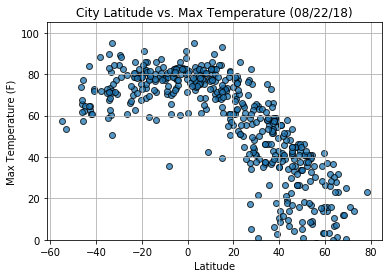

In [46]:
# scatter plot
plt.scatter(weather_df["Lat"],weather_df["Max Temp"], marker="o", alpha=0.75, edgecolor="black")

# print title and labels
plt.title("City Latitude vs. Max Temperature (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")

# set y limits and grids
plt.ylim(0,105)
plt.grid(True)

# save figure
plt.savefig("image/LattitudeVsTemp.png")

# display the figure
plt.show()

#### Latitude vs. Humidity Plot

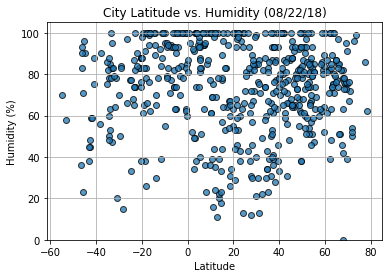

In [47]:
# scatter plot
plt.scatter(weather_df["Lat"],weather_df["Humidity"], marker="o", alpha=0.75, edgecolor="black")

# print title and labels
plt.title("City Latitude vs. Humidity (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")

# set y limits and grids
plt.ylim(0,105)
plt.grid(True)

# save figure
plt.savefig("image/LatitudeVsHumidity.png")

# display the figure
plt.show()

#### Latitude vs. Cloudiness Plot

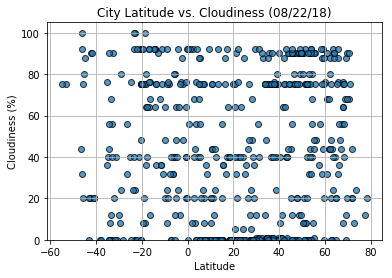

In [48]:
# scatter plot
plt.scatter(weather_df["Lat"],weather_df["Cloudiness"], marker="o", alpha=0.75, edgecolor="black")

# print title and labels
plt.title("City Latitude vs. Cloudiness (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")

# set y limits and grids
plt.ylim(0,105)
plt.grid(True)

# save figure
plt.savefig("image/LatitudeVsCloudiness.png")

# display the figure
plt.show()

#### Latitude vs. Wind Speed Plot

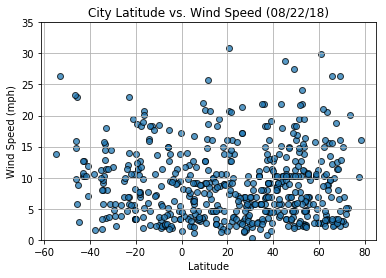

In [49]:
# scatter plot
plt.scatter(weather_df["Lat"],weather_df["Wind Speed"], marker="o", alpha=0.75, edgecolor="black")

# print title and labels
plt.title("City Latitude vs. Wind Speed (08/22/18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")

# set y limits and grids
plt.ylim(0,35)
plt.grid(True)

# save figure
plt.savefig("image/LatitudeVsWindSpeed.png")

# display the figure
plt.show()